In [1]:
"""Miniproject in Statistical Machine Learning course.
The project is to predict which songs, out of a data set of 200 songs, 
a teacher in the course will like. The training data consists of 750 songs,
which the teacher already has labeled with like or dislike.
The data consists not of the sound files themselves, but of song features extracted from them.


Song Features: {"acousticness","danceability","duration","energy","instrumentalness",
"key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"}
"""
#Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
#Classifiers
from sklearn.linear_model import LogisticRegression #kanske ta bort
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
#Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

scaler = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_power = PowerTransformer()
scaler_maxabs = MaxAbsScaler()
scaler_robust = RobustScaler()

from sklearn.model_selection import KFold


In [5]:
"""Loads the training and testing data"""

#Initializing RFE model (Recursive feature elimination)
model = LinearRegression()
rfe = RFE(model, 6)   
#Test rfe 5 k = 9 gave best result

url = 'http://www.it.uu.se/edu/course/homepage/sml/project/training_data.csv';
songs = pd.read_csv(url, na_values='?').dropna();
songs = songs.drop_duplicates(keep='first', inplace=False).reset_index(drop=True)

url_test = 'http://www.it.uu.se/edu/course/homepage/sml/project/songs_to_classify.csv'
songs_to_test = pd.read_csv(url_test, na_values='?').dropna();
X = songs[["acousticness","danceability","duration","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]];
y = songs["label"];
kf = KFold(n_splits = 10) 
kf.get_n_splits(X)

10

In [10]:
""" Checking how unbalanced the data is """
counter_1 = 0
counter_0 = 0
for i in y:
    if i == 1:
        counter_1 = counter_1 +1  
    if i == 0:
        counter_0 = counter_0 +1
        
print("counter 1: ",counter_1)
print("counter 0: ",counter_0)
print(counter_1/(counter_1+counter_0))

counter 1:  443
counter 0:  293
0.6019021739130435


In [3]:

"""Functions used for validating score and scaling data"""

def getScore(k,Xtrain,ytrain,Xtest,ytest):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xtrain,ytrain)
    return model.score(Xtest,ytest)

def TestScaler(model_input,Xtrain,Xtest):
    model = model_input
    model.fit(Xtrain)
    Xtrain = model.transform(Xtrain)
    Xtest = model.transform(Xtest)
    return Xtrain,Xtest

Text(0, 0.5, 'score')

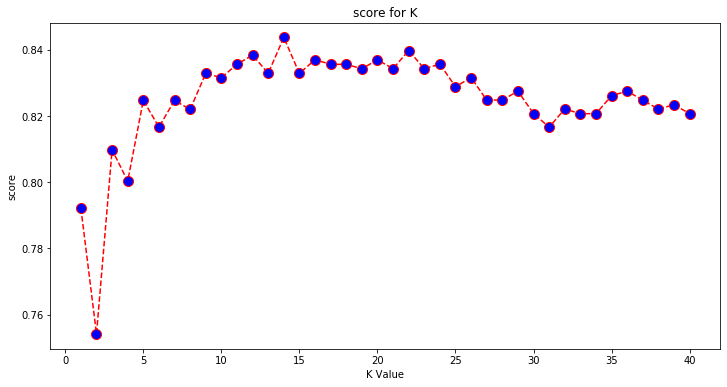

In [4]:
K_score = [];

"""
This is the validation algorithm, 10fold cross validation
plots the score for 40 different k-values
change number of dimensions and/or normalization algorithm for better results
Change Testscaler() input param 1 to another scaler """

for i in range(1, 41):
    scores = [];
    average_score = [];
    for train_index, test_index in kf.split(X):
        Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
        ytrain, ytest = y.loc[train_index], y.loc[test_index]
        Xtrain, Xtest = TestScaler(scaler_power,Xtrain,Xtest)
        Xtrain = rfe.fit_transform(Xtrain,ytrain)
        Xtest = rfe.transform(Xtest)
        scores.append(getScore(i,Xtrain,ytrain,Xtest,ytest))
        
    average_score = np.mean(scores)
    K_score.append(average_score)
    
"""Plots the accuracy/score of the classification with different K-values """
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), K_score, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('score for K')
plt.xlabel('K Value')
plt.ylabel('score')

In [9]:
"""Trains the model and returns an array with predictions
"""
scaler = StandardScaler()
def make_predictions():
    Xtest = songs_to_test[["acousticness","danceability","duration","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]];
    scaler.fit(X)
    Xtrain = scaler.transform(X)
    Xtest = scaler.transform(Xtest)
    Xtrain = rfe.fit_transform(X,y)
    Xtest = rfe.transform(Xtest)
    classifier = KNeighborsClassifier(n_neighbors=15);
    classifier.fit(Xtrain, y);
    ypred = classifier.predict(Xtest);
    result = ypred;
    result2 = ''.join(str(i) for i in result)
    return(result2)

00010111001101101011001100000011011111010101010110001101100011000111101011110110110101110000001011110111010111100111100001111100101011111100100011011010001111100100101100111100111011001110100111100111
